In [4]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv("patient.csv",  parse_dates=["confirmed_date"])

In [6]:
data.head(20)
dataGroupNot0 = data.loc[data["group"].isna()]
dataGroupNot0

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,NaN,NaN,isolated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,2018,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-28,NaN,NaN,isolated
2018,2019,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-28,NaN,NaN,isolated
2019,2020,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-28,NaN,NaN,isolated
2020,2021,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-28,NaN,NaN,isolated


In [7]:
data.tail(30)

data["day"] = data["confirmed_date"].dt.day
data["month"] = data["confirmed_date"].dt.month
data_in2 = data[data["month"] == 2]


In [8]:
data[data["id"] == 300]


,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,day,month
299,300,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-22,NaN,NaN,isolated,22,2


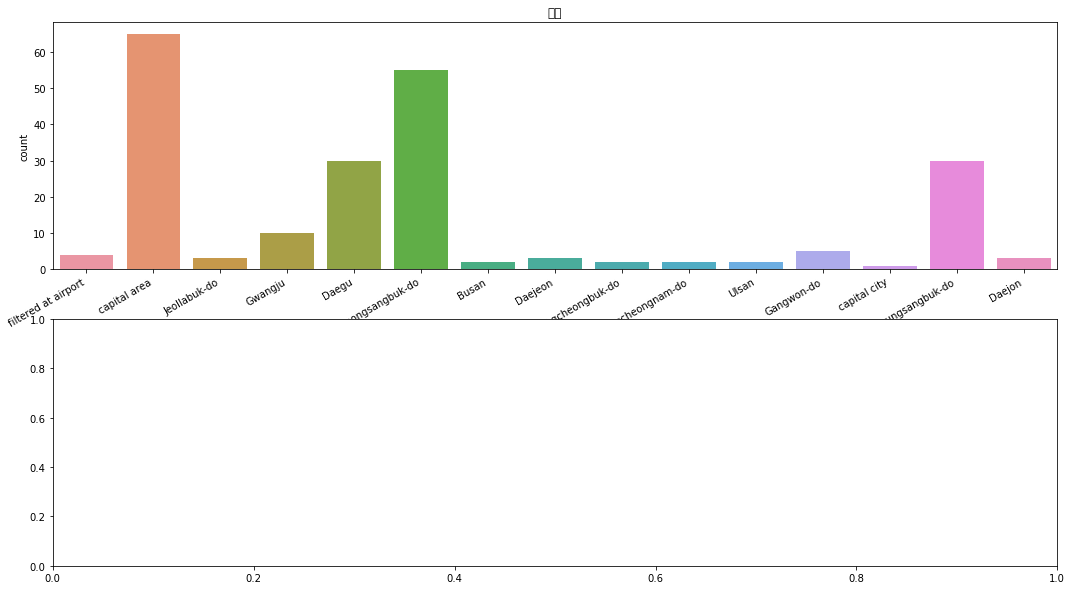

In [9]:
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(18,10)

plt.sca(axes[0])
plt.xticks(rotation=30, ha='right')
axes[0].set(ylabel='Count',title="지역")
sns.countplot(data=data, x="region", ax=axes[0])


In [13]:

list = []
for i in range(1,26):
    count = data_in2[data_in2["day"] == i]
    count_2 += count["id"].count()
    list.append([i,count_2])
counts = pd.DataFrame(list)
counts

,0,1
0,1,144
1,2,147
2,3,147
3,4,148
4,5,153
5,6,156
6,7,156
7,8,156
8,9,159
9,10,160


In [14]:
from sklearn.ensemble import RandomForestRegressor


temp = np.array(counts[0]).reshape(-1, 1)
print(temp)
model = RandomForestRegressor()
model.fit(temp, counts[1])

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]]


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [15]:
X_test = [26,27,28,29]
X_test=np.array(X_test).reshape(-1,1)

predict=model.predict(X_test)
predict

array([1011.39, 1011.39, 1011.39, 1011.39])